In [55]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

**Question 1**

1.  A model is linear if there is a relationship between our features and observations that can be plotted as a straight line. It is linear on a cartesian plane.
2. You need to remove the intercept or one of the columns to avoid multicolinearity. The correlation coefficient will tell you if you have an intercept (+/- 1.).
3. It should not be used for classification, linear regression is used for continuous variables and not discrete (ie quantitative data and not qualitative)
4. If the model only predicts the training data then it is overfitted. High variance is also an indicator of an overfitted model.
5. Multicolinearity is where several variables in a model are correlated. They'll have an intercept. When the independent variables are correlated to the error terms, it can leads to biased terms when using OLS alone.
6. Different techniques such as polynomial regression (most similar to multiple linear regression just with higher order terms) or decision trees (splitting data based on features)
7. The intercept represents where the regression line crosses the y axis, it isn't useful in contexts where 0 isn't meaningful, which is why we remove it in the code below, since review score is a categorical variable. A slope variable details the change in the variable as one increases in value.The coefficient of the dummy variable refers to the density of the variable in the data.

**Question 2**

In [56]:
df = pd.read_csv("Q1_clean.csv")
data = df.fillna(0)

In [57]:
avg = data.groupby('Neighbourhood ')[['Price', 'Review Scores Rating']].mean()
avg

,Price,Review Scores Rating
Neighbourhood,,
Bronx,75.276498,91.654378
Brooklyn,127.747378,92.363497
Manhattan,183.664286,91.801496
Queens,96.857233,91.549057
Staten Island,146.166667,90.843750


<Axes: xlabel='Price', ylabel='Density'>

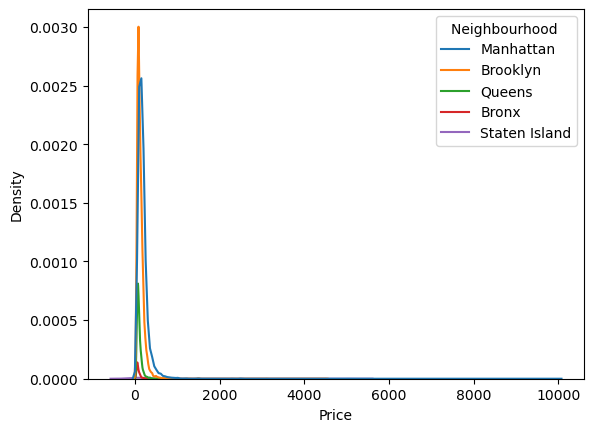

In [58]:
sns.kdeplot(data,x='Price', hue='Neighbourhood ')

<Axes: xlabel='Price', ylabel='Density'>

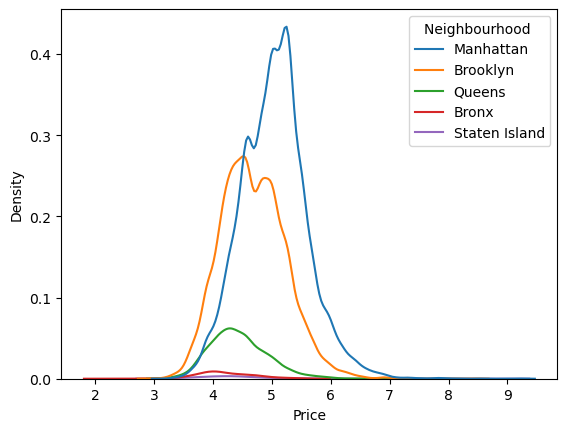

In [59]:
sns.kdeplot(data,x=np.log(data['Price']), hue="Neighbourhood ")

In [60]:
dummy = pd.get_dummies(data['Neighbourhood '], drop_first=True)
encode = pd.concat([data, dummy], axis=1)

In [61]:
model = LinearRegression(fit_intercept=False)
y = encode['Price']
model.fit(dummy, y)

LinearRegression(fit_intercept=False)

In [62]:
coefficients = model.coef_
coefficients_df = pd.DataFrame(coefficients, index=dummy.columns, columns=["Coefficient"])
coefficients_df

,Coefficient
Brooklyn,127.747378
Manhattan,183.664286
Queens,96.857233
Staten Island,146.166667


As reflected in the KDE plot Manhattan sees a higher coefficient when it comes to price, meaning that the average value of homes in that neighborhood is higher than the cheapest neighborhood, the Bronx.

In [63]:
dummy = pd.get_dummies(data['Neighbourhood '])
encode = pd.concat([data, dummy], axis=1)
model = LinearRegression(fit_intercept=True)
y = encode['Price']
model.fit(dummy, y)
coefficients = model.coef_
coefficients_df = pd.DataFrame(coefficients, index=dummy.columns, columns=["Coefficient"])
coefficients_df

,Coefficient
Bronx,4.076772e+11
Brooklyn,4.076772e+11
Manhattan,4.076772e+11
Queens,4.076772e+11
Staten Island,4.076772e+11


In [64]:
intercept = model.intercept_
intercept

-407677157848.9875

The numbers become wildly out of scale when the intercept is set to True. This is because the intercept is around - 40billion and is wildly skewing the data. It is near impossible to interpret these coefficients because they appear to all be the same on the table. To get a readable number you need to add the intercept to the coefficient.

In [65]:
dummy = pd.get_dummies(data['Neighbourhood '],data['Review Scores Rating'], data['Property Type'], drop_first=True)
encode = pd.concat([data, dummy], axis = 1)
y = encode['Price']
X_train, X_test, y_train, y_test = train_test_split(dummy, y, test_size = 0.2,random_state=5)

In [66]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred

array([128.54336283, 128.54336283, 183.51649287, ..., 183.51649287,
       183.51649287, 183.51649287])

In [67]:

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

125.0102311256715

In [68]:
r_square = model.score(X_test, y_test)
r_square

0.0653058117711991

In [69]:
coefficients = pd.DataFrame(model.coef_,X_train.columns, columns = ['Coefficient'])
coefficients

,Coefficient
"0 96.0\n1 100.0\n2 100.0\n3 94.0\n4 90.0\n ... \n22148 100.0\n22149 80.0\n22150 100.0\n22151 100.0\n22152 80.0\nName: Review Scores Rating, Length: 22153, dtype: float640 Apartment\n1 Apartment\n2 Apartment\n3 Apartment\n4 Apartment\n ... \n22148 Apartment\n22149 Apartment\n22150 Loft\n22151 Apartment\n22152 Apartment\nName: Property Type, Length: 22153, dtype: objectBrooklyn",53.069077
"0 96.0\n1 100.0\n2 100.0\n3 94.0\n4 90.0\n ... \n22148 100.0\n22149 80.0\n22150 100.0\n22151 100.0\n22152 80.0\nName: Review Scores Rating, Length: 22153, dtype: float640 Apartment\n1 Apartment\n2 Apartment\n3 Apartment\n4 Apartment\n ... \n22148 Apartment\n22149 Apartment\n22150 Loft\n22151 Apartment\n22152 Apartment\nName: Property Type, Length: 22153, dtype: objectManhattan",108.042207
"0 96.0\n1 100.0\n2 100.0\n3 94.0\n4 90.0\n ... \n22148 100.0\n22149 80.0\n22150 100.0\n22151 100.0\n22152 80.0\nName: Review Scores Rating, Length: 22153, dtype: float640 Apartment\n1 Apartment\n2 Apartment\n3 Apartment\n4 Apartment\n ... \n22148 Apartment\n22149 Apartment\n22150 Loft\n22151 Apartment\n22152 Apartment\nName: Property Type, Length: 22153, dtype: objectQueens",21.304613
"0 96.0\n1 100.0\n2 100.0\n3 94.0\n4 90.0\n ... \n22148 100.0\n22149 80.0\n22150 100.0\n22151 100.0\n22152 80.0\nName: Review Scores Rating, Length: 22153, dtype: float640 Apartment\n1 Apartment\n2 Apartment\n3 Apartment\n4 Apartment\n ... \n22148 Apartment\n22149 Apartment\n22150 Loft\n22151 Apartment\n22152 Apartment\nName: Property Type, Length: 22153, dtype: objectStaten Island",83.588214


In [70]:
property = coefficients.filter(like = "Property Type")
exp_property = property.idxmax()
exp_property

/var/folders/d7/g8wkwqjn04b5wd6db1c0_t740000gn/T/ipykernel_66557/344014871.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  exp_property = property.idxmax()


Series([], dtype: float64)

The most expensive apartment you can rent is an entire home

Since it assumes no multicolinearity, if these variables are correlated the value should change when we run multiple linear regression with more variables. I would expect these variables to be correlated (If the price is higher you'd expect a nicer apartment)

**Question 9**

In [71]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [72]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(data['creatinine_phosphokinase'], data['DEATH_EVENT'], test_size=0.2, random_state=5)

In [75]:
##model = LinearRegression(fit_intercept=True)
#model.fit(X_train, y_train)
#y_pred=model.predict(X_test)
#y_pred

In [78]:
dummy = pd.get_dummies(data['creatinine_phosphokinase'], data['high_blood_pressure'], drop_first=True)
encode = pd.concat([data, dummy], axis = 1)
y = encode['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(dummy, y, test_size = 0.2,random_state=5)

In [81]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred

array([ 4.43387795e-01,  1.21341977e-02,  4.43387795e-01,  1.97826415e+14,
        4.43387795e-01,  1.16086761e+00,  5.00742593e-01,  1.16086761e+00,
        1.01650825e+00,  1.25141758e-01,  4.43387795e-01,  9.33801442e-01,
       -3.20739267e-01,  1.00136620e+00, -1.95472164e+14,  9.98291575e-01,
        9.98291575e-01,  9.98291575e-01,  9.98291575e-01,  6.40689082e-01,
        9.83670245e-01,  4.28189325e+01,  4.43387795e-01,  1.07882708e+00,
        9.98291575e-01,  1.00055524e+00,  4.43387795e-01,  1.04516658e+00,
        9.98291575e-01,  9.65174971e-01,  5.00742593e-01,  4.43387795e-01,
        9.98291575e-01, -9.47510895e+13,  4.43387795e-01,  9.98291575e-01,
        2.12495023e-01,  1.04789420e+02, -3.00089805e-01,  9.98291575e-01,
        9.94532330e-01,  9.98291575e-01,  9.98772062e-01, -2.06349277e-01,
        9.98291575e-01,  4.43387795e-01, -5.08915082e-02,  2.48092287e+14,
        1.16086761e+00,  9.99057431e-01,  9.86864800e-01,  9.96599576e-01,
       -4.87877592e+13, -

In [82]:
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred

array([ 4.28571429e-01, -6.66133815e-16,  4.28571429e-01, -5.55111512e-17,
        4.28571429e-01,  1.00000000e+00,  5.00000000e-01,  1.00000000e+00,
       -2.77555756e-16,  0.00000000e+00,  4.28571429e-01,  1.00000000e+00,
        3.33066907e-16, -9.04331816e-47,  2.22044605e-16,  3.60822483e-16,
        1.21647484e-16, -1.11022302e-16,  1.11022302e-16,  1.00000000e+00,
       -1.84889275e-31,  1.38777878e-17,  4.28571429e-01,  1.09287579e-16,
        6.66133815e-16,  2.22044605e-16,  4.28571429e-01, -1.11022302e-16,
       -1.87350135e-16, -1.39218344e-31,  5.00000000e-01,  4.28571429e-01,
        1.11022302e-16,  5.55111512e-17,  4.28571429e-01,  0.00000000e+00,
        9.71445147e-16, -3.33066907e-16, -3.33066907e-16, -3.46944695e-17,
       -4.44089210e-16, -1.11022302e-16,  2.22044605e-16, -7.21644966e-16,
        0.00000000e+00,  4.28571429e-01,  0.00000000e+00,  5.93275429e-16,
        1.00000000e+00,  5.55111512e-17, -2.22044605e-16,  1.11022302e-16,
        7.92692700e-18,  

In [83]:
coefficients = pd.DataFrame(model.coef_,X_train.columns, columns = ['Coefficient'])
coefficients

,Coefficient
"0 1\n1 0\n2 0\n3 0\n4 0\n ..\n294 1\n295 0\n296 0\n297 0\n298 0\nName: high_blood_pressure, Length: 299, dtype: int64_30",-0.000000e+00
"0 1\n1 0\n2 0\n3 0\n4 0\n ..\n294 1\n295 0\n296 0\n297 0\n298 0\nName: high_blood_pressure, Length: 299, dtype: int64_47",6.666667e-01
"0 1\n1 0\n2 0\n3 0\n4 0\n ..\n294 1\n295 0\n296 0\n297 0\n298 0\nName: high_blood_pressure, Length: 299, dtype: int64_52",-0.000000e+00
"0 1\n1 0\n2 0\n3 0\n4 0\n ..\n294 1\n295 0\n296 0\n297 0\n298 0\nName: high_blood_pressure, Length: 299, dtype: int64_53",-0.000000e+00
"0 1\n1 0\n2 0\n3 0\n4 0\n ..\n294 1\n295 0\n296 0\n297 0\n298 0\nName: high_blood_pressure, Length: 299, dtype: int64_54",-0.000000e+00
...,...
"0 1\n1 0\n2 0\n3 0\n4 0\n ..\n294 1\n295 0\n296 0\n297 0\n298 0\nName: high_blood_pressure, Length: 299, dtype: int64_4540",0.000000e+00
"0 1\n1 0\n2 0\n3 0\n4 0\n ..\n294 1\n295 0\n296 0\n297 0\n298 0\nName: high_blood_pressure, Length: 299, dtype: int64_5209",4.487971e-17
"0 1\n1 0\n2 0\n3 0\n4 0\n ..\n294 1\n295 0\n296 0\n297 0\n298 0\nName: high_blood_pressure, Length: 299, dtype: int64_5882",1.000000e+00
"0 1\n1 0\n2 0\n3 0\n4 0\n ..\n294 1\n295 0\n296 0\n297 0\n298 0\nName: high_blood_pressure, Length: 299, dtype: int64_7702",0.000000e+00


This model confused me since as you can see I first tried to remove the intercept only to get a strangely low coefficient, I most likely need to standardize the columns to solve this I just would've expected more common numbers. I'd like to think I was intentional about this model and did more than just smash stuff together until it worked. To be fair to myself though I did have a lot of the same code available to me from question 2 to work on this one so it's not like this is all new stuff pulled straight from my head. In general I felt like this assignent was a lot harder for me to work through than the others since the concept is kind of abstract. I don't feel like I had a decent understanding of what I was doing until near the end of the assignment. With that in mind I'm not sure what could be done to make a better model other than standardizing the columns. I'm not sure how to interpret columns like this in terms of a binary variable like death event.